<a href="https://colab.research.google.com/github/odhrandooley/Met-Eireann/blob/main/3_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Function to give plots for CORINE, ESA-CCI and ECOSG for given lat,lon

Initialisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install netcdf4

!pip install pyproj
! pip install rioxarray

import xarray as xr
import rioxarray as rio

import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, ColorConverter
from osgeo import gdal
from pyproj import Proj, transform
!pip install git+git://github.com/geopandas/geopandas.git

import pandas as pd
import geopandas as gpd

##Co-ordinates and translations

In [ ]:
#latmax=55
#latmin=53
#lonmax=-7
#lonmin=-10
lonmin=-11 #longitude minimale
latmax=56 # latitude maximum
lonmax=-4 #longitude maximum
latmin=50  #latitude minimal

In [ ]:
PrimeCover = ['NoData','Ocean and Sea','inland Water','Nature','Urban']

In [ ]:
c0=(0/255.0,0/255.0,0/255.0,255/255.0)## 0 no value
c1=(0/255.0,0/255.0,128/255.0,255/255.0)##navy blue 1. Sea/ocean
c2=(255/255.0,250/255.0,250/255.0,255/255.0) ## Snow 2 inland water
c3=(50/255.0,205/255.0,50/255.0,255/255.0)##limegreen 3. nature
c4=(138/255.0,2/255.0,0/255.0,255/255.0)## red 4 urban

scheme=[c0,c1,c2,c3,c4]
colCOR = ListedColormap(scheme)

In [ ]:
fnESACCI='/content/drive/MyDrive/ESA-CCI/C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1.nc'
file_legend='/content/drive/MyDrive/CORINE/u2018_clc2018_v2020_20u1_raster100m/Legend/CLC2018_CLC2018_V2018_20_QGIS.txt'
fncorine='/content/drive/MyDrive/CORINE/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'
fnameSG='/content/drive/MyDrive/ECOCLIMAP_SG/ecosg_final_map.dir' #ecosg filename
covernamef='/content/drive/MyDrive/ECOCLIMAP_SG/ECOCLIMAP_SG_cover_data.csv' #file with all the cover name

In [ ]:
projection = 'EPSG:3035'
PROJECTION=Proj(projection)

projx,projy=PROJECTION(longitude=[lonmin,lonmax,lonmax,lonmin],latitude=[latmin,latmax,latmin,latmax])
xmin=min(projx)
xmax=max(projx)
ymin=min(projy)
ymax=max(projy)

xmin,xmax,ymin,ymax


(2838877.141247104, 3453337.5188303194, 3083054.5969610764, 3845537.4721423723)

In [ ]:

res=10 # Sentinel files resolution
src_fn=fncorine
out_fn='CORINEcut100m.tif' # 10m cutted filename
ds=gdal.Open(src_fn)
gdal.Translate(out_fn,ds,projWin = [2838800.000, 3845500.000, 3453300.000, 3083000.000],projWinSRS=projection) 

!gdalinfo $out_fn

In [ ]:
lonmin=-11.1 #longitude minimale
latmax=56.1 # latitude maximum
lonmax=-3.9 #longitude maximum
latmin=49.1  #latitude minimal

inECO = gdal.Open(fnameSG)
cutECO = 'ECO_cut.tif'

gdal.Translate(cutECO,inECO,
               projWin=[lonmin,latmax,lonmax,latmin], 
               projWinSRS='EPSG:4326')

dsECO=gdal.Open(cutECO)

projection = 'EPSG:3035'
warpSG = 'ECO_3035.tif'
gdal.Warp(warpSG, dsECO, dstSRS=projection,srcSRS='EPSG:4326',xRes=100,yRes=100)

outECO = 'ECOcut3035.tif'
dscutECO = gdal.Open(warpSG)
gdal.Translate(outECO,dscutECO,projWin = [2838800.000, 3845500.000, 3453300.000, 3083000.000],projWinSRS=projection)

!gdalinfo $outECO

#pixel size and number is the same, just slightly different bounds

ESACCI

In [ ]:
ncfile = xr.open_dataset(fnESACCI)
#Crop the file
LATMAX=58
LATMIN=49
LONMIN=-12
LONMAX=-3

LAT=ncfile['lat'][(ncfile['lat']<LATMAX)&(ncfile['lat']>LATMIN)]
LON=ncfile['lon'][(ncfile['lon']<LONMAX)&(ncfile['lon']>LONMIN)]
var=ncfile['lccs_class'][0,(ncfile['lat']<LATMAX)&(ncfile['lat']>LATMIN),
                         (ncfile['lon']<LONMAX)&(ncfile['lon']>LONMIN)]

#Check for the CRS
print(ncfile['crs'])
# add the crs value
var.rio.write_crs("epsg:4326", inplace=True)
#var=var.rio.set_crs("epsg:4326")

inESA  = 'raster.tif'
var.rio.to_raster(inESA)

<xarray.DataArray 'crs' ()>
array(-2147483647, dtype=int32)
Attributes:
    wkt:      GEOGCS["WGS 84", \n  DATUM["World Geodetic System 1984", \n    ...
    i2m:      0.002777777777778,0.0,0.0,-0.002777777777778,-180.0,90.0


In [ ]:
var.values
!gdalinfo $cutESA

In [ ]:
inESA  = 'raster.tif'

lonmin=-11.1 #longitude minimale
latmax=56.1 # latitude maximum
lonmax=-3.9 #longitude maximum
latmin=49.1  #latitude minimal

cutESA = 'ESA_cut.tif'

gdal.Translate(cutESA,inESA,
               projWin=[lonmin,latmax,lonmax,latmin], 
               projWinSRS='EPSG:4326')

dsESA=gdal.Open(cutESA)
print(dsESA)
projection = 'EPSG:3035'
warpESA = 'ESA_3035.tif'
gdal.Warp(warpESA, dsESA, dstSRS=projection,srcSRS='EPSG:4326',xRes=100,yRes=100)

outESA = 'ESAcut3035.tif'
dscutESA = gdal.Open(warpESA)            # 2838714.755, 3845543.780, 3453214.755, 3083043.780
gdal.Translate(outESA,dscutESA,projWin = [2838800.000, 3845500.000, 3453300.000, 3083000.000],
               projWinSRS=projection)

!gdalinfo $outESA

#pixel size and number is the same, just slightly different bounds

#Functions to open data, and allow plotting

##ECOSG

In [ ]:
def cover_fraction(filename):
    data=open(filename)
    covernum=[]
    covername=[]
    cityfrac=[]
    vegfrac=[]
    inwaterfrac=[]
    seafrac=[]
    for i,d in enumerate(data):
        if i==0:
            fieldnames=d.split(',')
            covername.append('no data')
            cityfrac.append(0.0)
            vegfrac.append(0.0)
            inwaterfrac.append(0.0)
            seafrac.append(0.0)
        else:
#           print(d.split(','))
            covernum.append(int(d.split(',')[0]))
            covername.append(d.split(',')[1])
            cityfrac.append(float(d.split(',')[2]))
            vegfrac.append(float(d.split(',')[3]))
            inwaterfrac.append(float(d.split(',')[4]))
            seafrac.append(float(d.split(',')[5]))
    return(fieldnames,np.array(covernum),covername,np.array(cityfrac),np.array(vegfrac),
           np.array(inwaterfrac),np.array(seafrac))

In [ ]:
def read_legend_file(file_legend):
  data=open(file_legend)
  text=[t for t in data]
  covernum=[int(d.split(',')[0]) for d in text]
  colors=[tuple((int(d.split(',')[1])/255.0,int(d.split(',')[2])/255.0,int(d.split(',')[3])/255.0,int(d.split(',')[4])/255.0)) for d in text]
  covername=[d.split(',')[5] for d in text]
  return(data,text,covernum,colors,covername)

In [ ]:
cover_fraction(covernamef)[2]


In [ ]:
def get_dataSG(fname,latmax,latmin,lonmax,lonmin,projection):

    gdal.UseExceptions()
    dinputf = gdal.Open(fname)
    output='tempSG.tif'    
    gdal.Translate(output,dinputf,projWin=[lonmin,latmax,lonmax,latmin],
                   projWinSRS=projection)
    ds=gdal.Open(output)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #
    #
    #
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)


    #Chunck the data to save RAM for plotting
    #Ydecreasing
    b=np.min(np.where(Y<latmin)[0])
    a=np.max(np.where(Y>latmax)[0])

    c=np.max(np.where(X<lonmin)[0])
    d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y
    LON=X
    D=data

    return (LAT,LON,D)


In [ ]:
def ECOtoPrimary(array):
  array1 = np.zeros([len(array),len(array[0])])
  for i in range(0, len(array)):
    for j in range(0,len(array[0])):
      cond1 = array[i,j] == 2 or array[i,j] == 3
      cond2 = array[i,j] == 22 or array[i,j] == 23
      
      if array[i,j] == 0:
        array1[i,j] = 0 #no data
      if array[i,j] == 1:
        array1[i,j] = 1 #sea and ocean
      if cond1 == True or cond2 == True:
        array1[i,j] = 2 #inland water
      if array[i,j] >3 and array[i,j] <=23:
        array1[i,j] = 3  #nature    
      if array[i,j] > 23 and array[i,j] <= 33:
        array1[i,j] = 4  #urban
      
  return array1

In [ ]:
def count(array, num):
  a = 0
  for i in range(0, len(array)):
    for j in range(0,len(array[0])):
      if array[i,j] == num:
        a+=1
  return a/np.size(array)

##ESACCI

In [ ]:
def ESAtoPrimary(array):
  array1 = np.zeros([len(array),len(array[0])])
  for i in range(0, len(array)):
    for j in range(0,len(array[0])):
      cond1 = array[i,j] >0 and array[i,j] <=153
      cond2 = array[i,j] >199 and array[i,j] <=202
      cond3 = array[i,j] == 220
      
      if array[i,j] == 0:
        array1[i,j] = 0 #no data
      if cond1 == True or cond2== True or cond3 == True:
        array1[i,j] = 3 #nature
      if array[i,j] >159 and array[i,j] <=180:
        array1[i,j] = 2 #inland water  
      if array[i,j] == 210:
        array1[i,j] = 1 #ocean and sea
      if array[i,j] == 190:
        array1[i,j] = 4 #urban
  return array1

In [ ]:
def openESAdata(fn,latmin,latmax,lonmin,lonmax):
    ds=xr.open_dataset(fn)
    D=ds.lccs_class
    indlat=np.where((D.lat.values<latmax) * (D.lat.values>latmin)==1)[0]
    indlon=np.where((D.lon.values>lonmin) * (D.lon.values<lonmax)==1)[0]
    Dn=D[0,indlat,indlon]
    FV=Dn.flag_values
    legendlist=Dn.flag_meanings.split(' ')
    LEGL=[l.capitalize().replace('_',' ') for l in legendlist]
    colorlist=Dn.flag_colors.split(' ')
    c=ColorConverter().to_rgb
    rgbc=[c(col) for col in colorlist]
    newcmap=ListedColormap(rgbc)
    Dplot=Dn.values
    for i,fv in enumerate(FV):
        Dplot[np.where(Dn.values==fv)]=i
    return(FV,Dplot,Dn,LEGL,newcmap)

In [ ]:
def getcenterandextentinlatlon(ulx,uly,extent,projection='EPSG:32629'):
    lrx=ulx+extent
    lry=uly-extent
    cx=ulx+extent*0.5
    cy=uly-extent*0.5
    p=Proj(projection)
    ULX,ULY=p(ulx,uly, inverse=True)
    LRX,LRY=p(lrx,lry, inverse=True)
    CX,CY=p(cx,cy, inverse=True)
    extentx=LRX-CX
    extenty=CY-LRY
    return(CX,CY,extentx,extenty)

##CORINE

In [ ]:
def get_data(fname,latmax,latmin,lonmax,lonmin):

    gdal.UseExceptions()
    ds = gdal.Open(fname)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #
    #
    #
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)


    #Chunck the data to save RAM for plotting
    #Ydecreasing
    b=np.min(np.where(Y<latmin)[0])
    a=np.max(np.where(Y>latmax)[0])

    c=np.max(np.where(X<lonmin)[0])
    d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y[a:b]
    LON=X[c:d]
    D=data[a:b,c:d]

    return (LAT,LON,D)

In [ ]:
def corinecolormap(colors):
  c=ColorConverter().to_rgb
  rgbc=[c(col) for col in colors]
  newcmap=ListedColormap(rgbc)
  return(newcmap)
  

In [ ]:
def Adjustdatasetforploting(D,covernum):
  Dplot=D
  for i,fv in enumerate(covernum):
      Dplot[np.where(D==fv)]=i
  Dplot[Dplot==128]=44 ### put the no data values (128) to 44 (sea and ocean)
  return Dplot

In [ ]:
read_legend_file(file_legend)[1][44]

'999,255,255,255,255,NODATA'

In [ ]:
def CORtoPrimary(array):
  array1 = np.zeros([len(array),len(array[0])])
  for i in range(0, len(array)):
    for j in range(0,len(array[0])):
      
      if array[i,j] >=0 and array[i,j] <=10:
        array1[i,j] = 4 #urban
      if array[i,j] >=11 and array[i,j] <=36:
        array1[i,j] = 3 #nature
      if array[i,j] >= 37 and array[i,j] <=42:
        array1[i,j] = 2 #inland water  
      if array[i,j] == 43 or array[i,j] == 44:
        array1[i,j] = 1 #ocean
      #else:
       # array1[i,j] = 0 # no data
  return array1

  #what do I do for no data then?

In [ ]:
latmax=54
latmin=53
lonmax=-8
lonmin=-9

projection = 'EPSG:3035'
PROJECTION=Proj(projection)

projx,projy=PROJECTION(longitude=[lonmin,lonmax,lonmax,lonmin],latitude=[latmin,latmax,latmin,latmax])
xmin=min(projx)
xmax=max(projx)
ymin=min(projy)
ymax=max(projy)



fname='CORINEcut100m.tif'
LATC,LONC, DCOR = get_data(fname,ymax,ymin,xmax,xmin)

fname = outESA
LATESA,LONESA, DESA = get_data(fname,ymax,ymin,xmax,xmin)

fname = outECO
LATECO,LONECO, DECO = get_data(fname,ymax,ymin,xmax,xmin)

In [ ]:
DECO

array([[17, 23, 23, ...,  2,  2,  2],
       [17, 23, 17, ...,  2,  2,  2],
       [17, 17, 23, ...,  2,  2,  2],
       ...,
       [32, 17, 17, ..., 13, 13, 13],
       [17, 17, 17, ..., 13, 13, 13],
       [17, 17, 17, ..., 13, 13, 13]], dtype=uint8)

In [ ]:
DESA

array([[110, 110, 110, ..., 210, 210, 210],
       [110, 110, 110, ..., 210, 210, 210],
       [110, 110, 100, ..., 210, 210, 210],
       ...,
       [ 30, 130, 130, ...,  70,  70,  70],
       [130, 130, 130, ...,  70,  70,  70],
       [130, 130, 130, ...,  70,  70,  70]], dtype=uint8)

In [ ]:
PriCOR = CORtoPrimary(DCOR)
PriESA = ESAtoPrimary(DESA)
PriECO = ECOtoPrimary(DECO)

In [ ]:
PriECO = ECOtoPrimary(DECO)

In [ ]:
print(PriCOR)
print(PriESA)
print(PriECO)

[[3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 ...
 [4. 3. 3. ... 3. 3. 3.]
 [4. 3. 3. ... 3. 3. 3.]
 [4. 4. 3. ... 3. 3. 3.]]
[[3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 [3. 3. 3. ... 1. 1. 1.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]
[[3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 ...
 [4. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]


##Barplot

In [ ]:
def Bar(array):
  no_data = 0
  ocean =  0
  inland_water = 0
  nature = 0
  urban = 0 
  for i in range(0, len(array)):
    for j in range(0,len(array[0])):
      if array[i,j] == 0:
        no_data += 1
      if array[i,j] == 1:
        ocean +=1
      if array[i,j] ==2:
        inland_water += 1
      if array[i,j] ==3:
        nature +=1  
      if array[i,j] ==4:
        urban +=1
  a = np.array([no_data,ocean,inland_water,nature,urban])/np.size(array)
  return a


In [ ]:
BarCORINE = Bar(PriCOR)
BarECO = Bar(PriECO)
BarESA = Bar(PriESA)


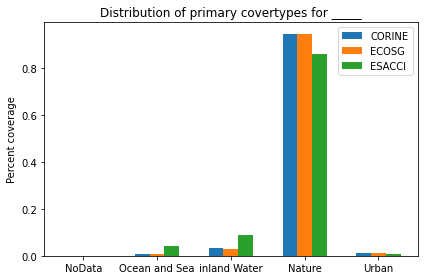

In [ ]:


labels = PrimeCover
fig, ax = plt.subplots()
ax.set_ylabel('Percent coverage')
ax.set_title('Distribution of primary covertypes for _____')



data = [BarCORINE,BarECO,BarESA]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars



rects1 = ax.bar(x - width, data[0], width, label='CORINE')
rects2 = ax.bar(x         , data[1], width, label='ECOSG')
rects2 = ax.bar(x + width, data[2], width, label='ESA-CCI')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent coverage')
ax.set_title('Distribution of primary covertypes for _____')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(labels=['CORINE', 'ECOSG','ESACCI'])

fig.tight_layout()

plt.show()

In [ ]:
#comboplot
def diffBar(array1,array2,labels):
  if np.shape(array1) != np.shape(array2):
    return print('Error, dimensions of arrays are inconsistent')
  b = len(labels)
  a = np.zeros([b,b])
  for i in range(0, len(array1)):
    for j in range(0,len(array1[0])):
      for k in range(0,b):
        for f in range(0,b):
          if array1[i,j] == k:
            if array2[i,j]==f:
              a[k,f] += 1
  return a/np.size(array1)

In [ ]:
Dif_ECOCOR=diffBar(PriECO,PriCOR, PrimeCover)

In [ ]:
#DiffECO_CORINE = np.array([[0,.02,0,0,0,.01],[.03,.25,.02,0,0,0],[0,.01,0.05,0,0,.02],[0,0,.02,.07,.01,0],[0,0,0,.1,.05,.05],[0,.05,.06,.0,.03,.15]])
#DiffECO_CORINE

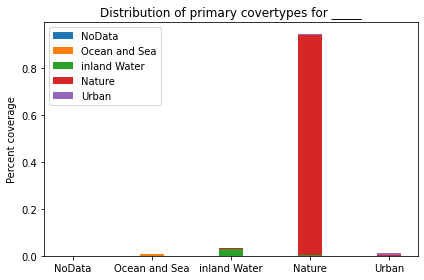

In [ ]:
#barplot where bars show what covertypes a covertype in one map is made up of 

labels = PrimeCover
fig, ax = plt.subplots()
ax.set_ylabel('Percent coverage')
ax.set_title('Distribution of primary covertypes for _____')


#data = ECOArray,CORINEArray
#Bar(ECOArray)
#DiffBar(ECOArray,CORINEArray)
data =Dif_ECOCOR
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

bar12 = np.add(data[0,:], data[1,:]).tolist()
bar123 = np.add(bar12, data[2,:]).tolist()
bar1234 = np.add(bar123, data[3,:]).tolist()
bar12345 = np.add(bar1234, data[4,:]).tolist()
#bar123456 = np.add(bar12345, data[5,:]).tolist()


ax.bar(x , data[0,:], width, label=labels[0])
ax.bar(x , data[1,:], width, bottom=data[0,:], label=labels[1])
ax.bar(x , data[2,:], width, bottom=bar12, label=labels[2])
ax.bar(x , data[3,:], width, bottom=bar123,label=labels[3])
#ax.bar(x , data[4,:], width, bottom=bar1234, label='Wetlands')
ax.bar(x , data[4,:], width, bottom=bar1234, label=labels[4])

#ax.bar(x , data[0,:], width, label='NoData')
#ax.bar(x , data[1,:], width, bottom=data[0,:], label='Water')
#ax.bar(x , data[2,:], width, bottom=bar12, label='Nature')
#ax.bar(x , data[3,:], width, bottom=bar123,label='Agriculture')
#ax.bar(x , data[4,:], width, bottom=bar1234, label='Wetlands')
#ax.bar(x , data[4,:], width, bottom=bar1234, label='Urban')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent coverage')
ax.set_title('Distribution of primary covertypes for _____')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#misc

In [ ]:
#not done
def PlotMap(fname,fnESACCI,fnameSG,file_legend,
            latmin,latmax,lonmin,lonmax,Difference=0):
  
  fig=plt.figure(figsize=(30,60))
  grid = plt.GridSpec(4, 2, hspace=0.25, wspace=0.25)
  
  #corine
  (LAT,LON,D) = get_data(fname,latmax,latmin,lonmax,lonmin)
  
  (data,text,covernum,colors,covername)=read_legend_file(file_legend)
  Dplot=Adjustdatasetforploting(D,covernum)
  newcmap=corinecolormap(colors)

  fig, axs = plt.subplots(1, 1,figsize=(30, 30))
  ax1=axs
  LONg, LATg = np.meshgrid(LON, LAT)
  c=ax1.pcolormesh(LONg,LATg,Dplot-1,cmap=newcmap,vmin=0,vmax=len(covernum))
  ax1.set_xlim(lonmin,lonmax)
  ax1.set_ylim(latmin,latmax)
  cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covernum)),extendfrac='auto', spacing='proportional')   
  cb.set_ticklabels(covername)
  cb.ax.tick_params(labelsize=15)
  ax1.tick_params(labelsize=15)
  fig.savefig('CORINE_plot.png',format='png',quality=95,bbox_inches='tight')

#Assembling Function

In [ ]:
latmax=53.4
latmin=53.25
lonmax=-8.15
lonmin=-8.3

In [ ]:
def PlotCORINE(file_legend,fname,latmax,latmin,lonmax,lonmin):
  
  (LAT,LON,D) = get_data(fname,latmax,latmin,lonmax,lonmin)

  (data,text,covernum,colors,covername)=read_legend_file(file_legend)
  # Adjust the dataset for easier plotting
  Dplot=Adjustdatasetforploting(D,covernum)
  # Create the colormap
  newcmap=corinecolormap(colors)

  fig, axs = plt.subplots(1, 1,figsize=(30, 30))
  ax1=axs
  LONg, LATg = np.meshgrid(LON, LAT)
  c=ax1.pcolormesh(LONg,LATg,Dplot-1,cmap=newcmap,vmin=0,vmax=len(covernum))
  ax1.set_xlim(lonmin,lonmax)
  ax1.set_ylim(latmin,latmax)
  cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covernum)),extendfrac='auto', spacing='proportional')   
  cb.set_ticklabels(covername)
  cb.ax.tick_params(labelsize=15)
  ax1.tick_params(labelsize=15)
  fig.savefig('CORINE_plot.png',format='png',quality=95,bbox_inches='tight')

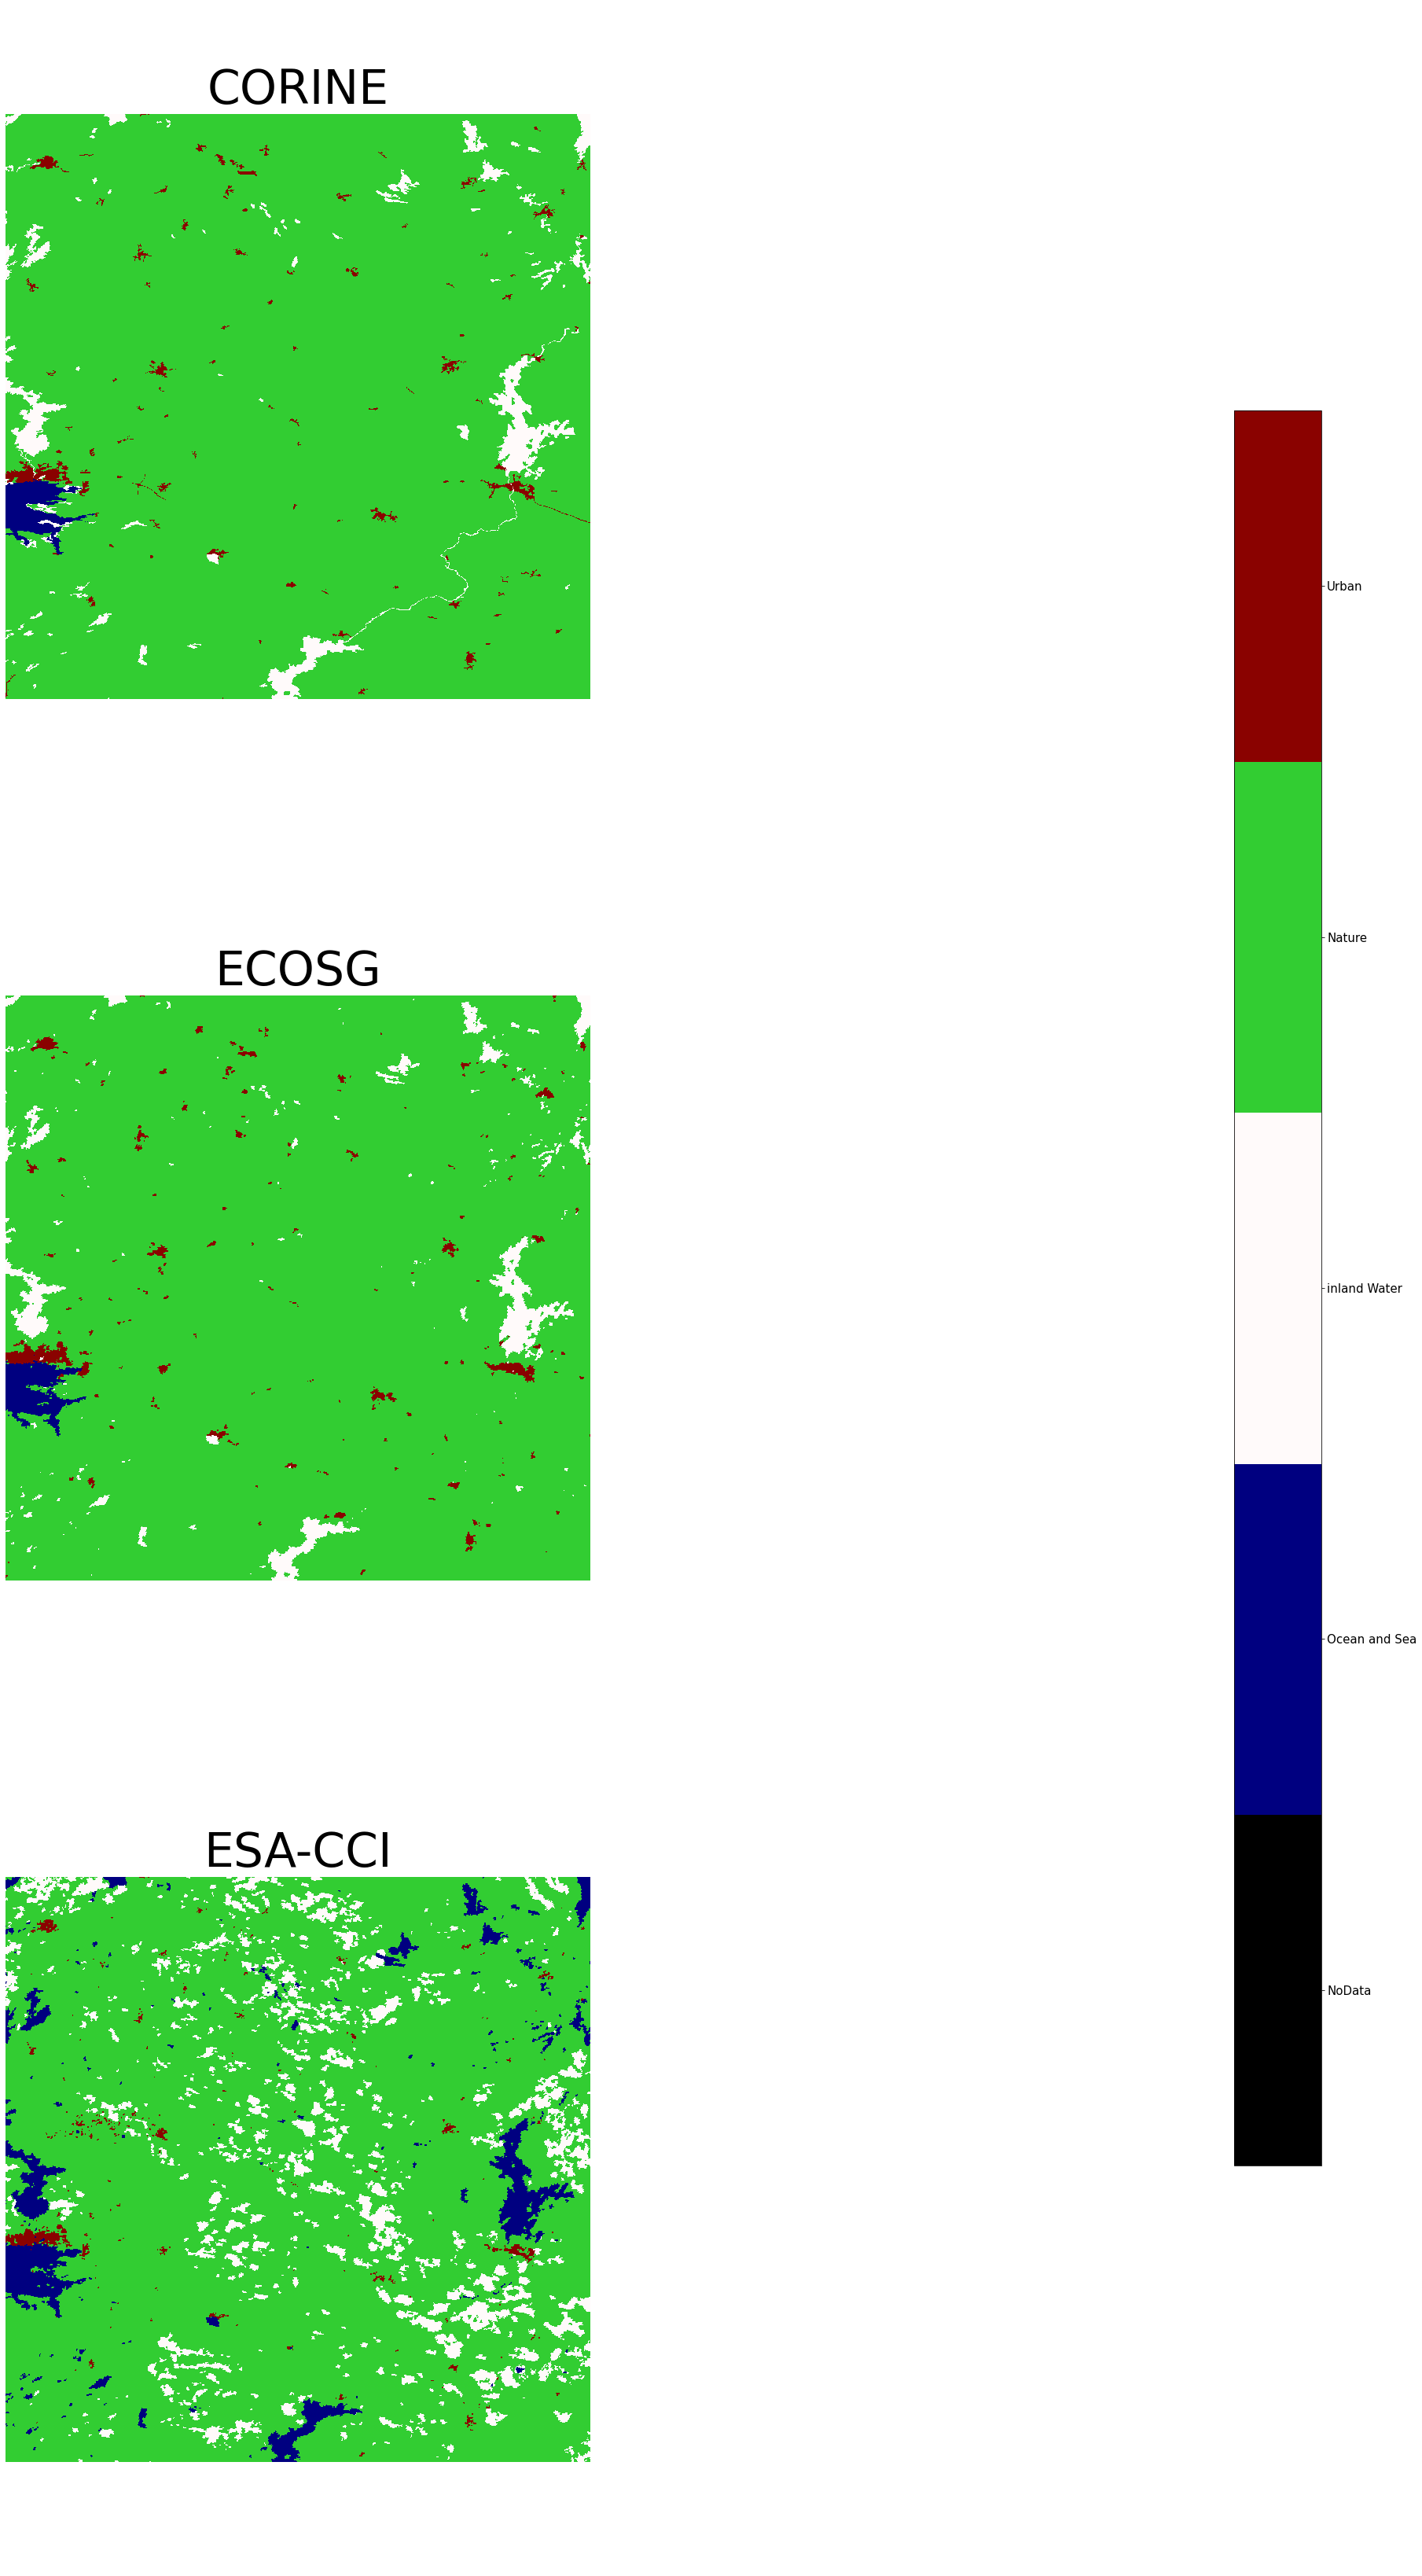

In [ ]:

latmax=54
latmin=53
lonmax=-8
lonmin=-9

projection = 'EPSG:3035'
PROJECTION=Proj(projection)

projx,projy=PROJECTION(longitude=[lonmin,lonmax,lonmax,lonmin],latitude=[latmin,latmax,latmin,latmax])
xmin=min(projx)
xmax=max(projx)
ymin=min(projy)
ymax=max(projy)

LATC,LONC, DCOR
LATESA,LONESA, DESA
LATECO,LONECO, DECO

fig=plt.figure(figsize=(30,60))
grid = plt.GridSpec(3, 2, hspace=0.1, wspace=0.25)

#fig, axs = plt.subplots(1, 1,figsize=(30, 30))
#ax1=axs

ax0=fig.add_subplot(grid[0, 0],adjustable='box',
                    aspect=(xmin-xmax)/((ymin-ymax)))
LONg, LATg = np.meshgrid(LONC, LATC)
c=ax0.pcolormesh(LONC,LATC,PriCOR,cmap=colCOR,vmin=0,vmax=len(PrimeCover))

ax0.set_xlim(xmin,xmax)
ax0.set_ylim(ymin,ymax)
ax0.axis('off')

ax1=fig.add_subplot(grid[1, 0],adjustable='box',
                    aspect=(xmin-xmax)/((ymin-ymax)))
LONg, LATg = np.meshgrid(LONECO, LATECO)
c=ax1.pcolormesh(LONECO,LATECO,PriECO,cmap=colCOR,vmin=0,vmax=len(PrimeCover))

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.axis('off')

ax2=fig.add_subplot(grid[2, 0],adjustable='box',
                    aspect=(xmin-xmax)/((ymin-ymax)))
LONg, LATg = np.meshgrid(LONESA, LATESA)
c=ax2.pcolormesh(LONESA,LATESA,PriESA,cmap=colCOR,vmin=0,vmax=len(PrimeCover))

ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.axis('off')

ax0.set_title('CORINE', fontsize= 60)
ax1.set_title('ECOSG', fontsize= 60)
ax2.set_title('ESA-CCI', fontsize= 60)

cbar_ax = fig.add_subplot(grid[:, 1])
cb=plt.colorbar(c, ax=cbar_ax, ticks=np.arange(0.5,len(PrimeCover)),
                extendfrac='auto', spacing='proportional')   
cb.set_ticklabels(PrimeCover)
cb.ax.tick_params(labelsize=15)
cbar_ax.tick_params(labelsize=15)
cbar_ax.axis('off')
fig.savefig('3_plots.png',format='png',quality=95,bbox_inches='tight')

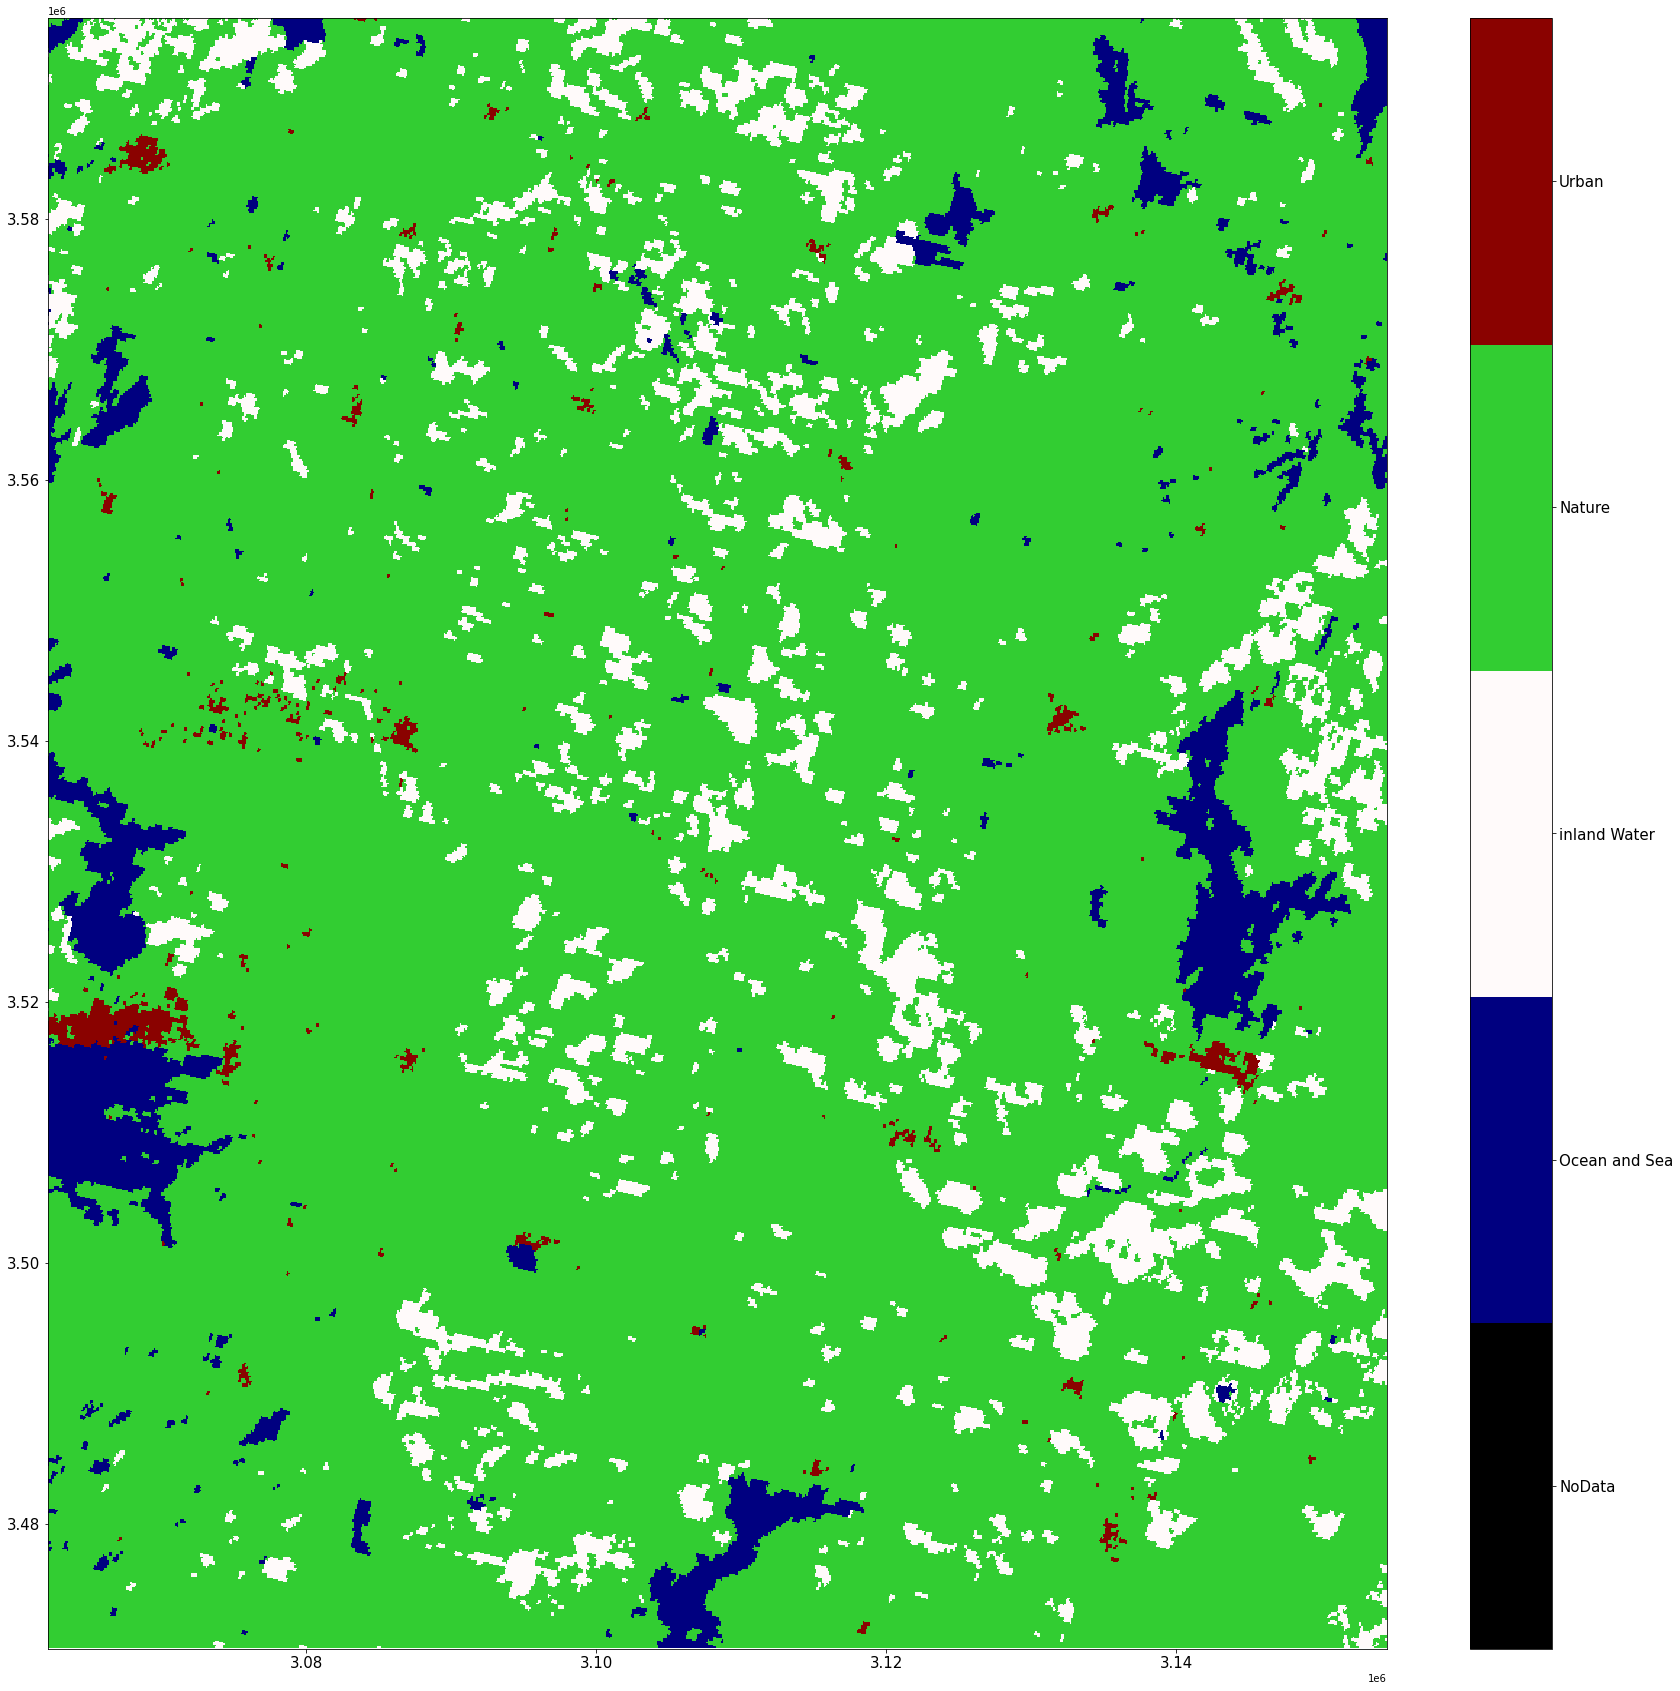

In [ ]:
latmax=54
latmin=53
lonmax=-8
lonmin=-9

projection = 'EPSG:3035'
PROJECTION=Proj(projection)

projx,projy=PROJECTION(longitude=[lonmin,lonmax,lonmax,lonmin],latitude=[latmin,latmax,latmin,latmax])
xmin=min(projx)
xmax=max(projx)
ymin=min(projy)
ymax=max(projy)

LATC,LONC, DCOR
LATESA,LONESA, DESA
LATECO,LONECO, DECO

(data,text,covernum,colors,covername)=read_legend_file(file_legend)
# Adjust the dataset for easier plotting
#Dplot=Adjustdatasetforploting(D,covernum)
# Create the colormap

fig, axs = plt.subplots(1, 1,figsize=(30, 30))
ax1=axs
LONg, LATg = np.meshgrid(LONESA, LATESA)

c=ax1.pcolormesh(LONESA,LATESA,PriESA,cmap=colCOR,vmin=0,vmax=len(PrimeCover))
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(PrimeCover)),extendfrac='auto', spacing='proportional')   
cb.set_ticklabels(PrimeCover)
cb.ax.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
fig.savefig('CORINE_plot.png',format='png',quality=95,bbox_inches='tight')

In [ ]:
savefile_suffix='ESA-CCI'
#fig=plt.figure(figsize=(30,60))
#grid = plt.GridSpec(4, 2, hspace=0.25, wspace=0.25)
# Galway Bog
ulx=475460
uly=5907600
extent=2500
(CX,CY,extentx,extenty)=getcenterandextentinlatlon(ulx,uly,extent,projection='EPSG:32629')
latmin=CY-extenty
latmax=CY+extenty
lonmin=CX-extentx
lonmax=CX+extentx
#ax0=fig.add_subplot(grid[0, 0],adjustable='box',aspect=(lonmin-lonmax)/((latmin-latmax)))
#(FV,Dplot,Dn,legendlist,newcmap)=openESAdata(fnESACCI,latmin-0.1,latmax+0.1,lonmin-0.1,lonmax+0.1) # the 0.1 is just to cover the projection reshaping
#LONg, LATg = np.meshgrid(Dn.lon.values, Dn.lat.values)
#c=ax0.pcolormesh(LONg, LATg, Dplot,cmap=newcmap,vmin=1,vmax=len(FV))
#ax0.set_xlim(lonmin,lonmax)
#ax0.set_ylim(latmin,latmax)
#ax0.set_xlim(lonmin,lonmax)
#ax0.set_ylim(latmin,latmax)
#ax0.axis('off')

In [ ]:
def plotECOSG(fnameSG,covernamef,latmin,latmax,lonmin,lonmax,
              savefile_suffix,fsize=(30,30)):
      #latmin=centerlat-plotextenty
      #latmax=centerlat+plotextenty
      #lonmin=centerlon-plotextentx
      #lonmax=centerlon+plotextentx
      (LATSG,LONSG,DSG)=get_dataSG(fnameSG,latmax+0.1,latmin-0.1,lonmax+0.1,lonmin-0.1) # the 0.1 is just to cover the projection reshaping
      (fieldnames,covernum,covername,cityfrac,vegfrac,inwaterfrac,seafrac)=cover_fraction(covernamef)
      fig, axs = plt.subplots(1, 1,figsize=fsize)
      ax1=axs
      LONg, LATg = np.meshgrid(LONSG,LATSG)
      c=ax1.pcolormesh(LONSG,LATSG,DSG,cmap=colSG, vmin=0,vmax=len(covername))
      ax1.set_xlim(lonmin,lonmax)
      ax1.set_ylim(latmin,latmax)
      cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covername)+0.5),extendfrac='auto', spacing='proportional',pad=0.003)   
      cb.set_ticklabels(covername)
      cb.ax.tick_params(labelsize=35)
      ax1.tick_params(labelsize=35)
      plt.axis('off')
      fig.savefig(savefile_suffix+'ecosg.png',bbox_inches='tight')
  

In [ ]:
def plotESACCI(fnESACCI, latmin, latmax, lonmin, lonmax, savefile_suffix,
               fsize=(30,30)):
      #latmin=centerlat-plotextenty
      #latmax=centerlat+plotextenty
      #lonmin=centerlon-plotextentx
      #lonmax=centerlon+plotextentx
      
      (FV,Dplot,Dn,legendlist,newcmap)=openESAdata(fnESACCI,latmin-0.1,latmax+0.1,lonmin-0.1,lonmax+0.1) # the 0.1 is just to cover the projection reshaping
      fig, axs = plt.subplots(1, 1,figsize=fsize)
      ax1=axs
      LONg, LATg = np.meshgrid(Dn.lon.values, Dn.lat.values)
      c=ax1.pcolormesh(LONg, LATg, Dplot,cmap=newcmap,vmin=1,vmax=len(FV))
      #cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(FV)),extendfrac='auto', spacing='proportional',pad=0.003)  
      ax1.set_xlim(lonmin,lonmax)
      ax1.set_ylim(latmin,latmax)
      #cb.set_ticklabels(legendlist)
      #cb.ax.tick_params(labelsize=35)
      ax1.tick_params(labelsize=35)
      plt.axis('off')
      fig.savefig(savefile_suffix+'ESA_CCI_2018.png',bbox_inches='tight')


In [ ]:
latmax=53.4
latmin=53.25
lonmax=-8.15
lonmin=-8.3

from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3035")
xmin1,ymin1 =transformer.transform(latmin,lonmin)
xmax1,ymax1 = transformer.transform(latmax,lonmax)

print(xmin1,xmax1,ymin1,ymax1)
fname = out_fn

gdal.UseExceptions()
ds = gdal.Open(fname)
data = ds.ReadAsArray()

gt = ds.GetGeoTransform()
print(ds.RasterXSize,ds.RasterYSize)
#
#
#
xres = gt[1]
yres = gt[5]
#
xmin = gt[0]
ymin = gt[3]

rastx = ds.RasterXSize
rasty = ds.RasterYSize


xmax = gt[0] + (xres * ds.RasterXSize)
ymax = gt[3] + (yres * ds.RasterYSize)

#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


X=np.arange(xmin+xres,xmax+xres,xres)
Y=np.arange(ymin+yres,ymax+yres,yres)
print(X,Y)

#Chunck the data to save RAM for plotting
#Ydecreasing
b=np.min(np.where(Y<ymin1)[0])
a=np.max(np.where(Y>ymax1)[0])

c=np.max(np.where(X<xmax1)[0])
d=np.min(np.where(X>xmax1)[0])

#    print(np.max(data))
#    print(np.min(data))
#ECOCLIMAP data have no projections so no need to reproject the data
#to be verified for other datasets
LAT=Y[a:b]
LON=X[c:d]
D=data[a:b,c:d]

LAT,LON,D

3502507.872721427 3516254.053234632 3114394.413675715 3128230.0257364768
6145 7625
[2838900. 2839000. 2839100. ... 3453100. 3453200. 3453300.] [3845400. 3845300. 3845200. ... 3083200. 3083100. 3083000.]


ValueError: ignored